In [1]:
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mu = [0.1,0.1,0.1,0.1,0.3,0.3]
rv = sp.stats.multinomial(1,mu)

In [2]:
xx = np.arange(1,7)
xx_ohe = pd.get_dummies(xx)

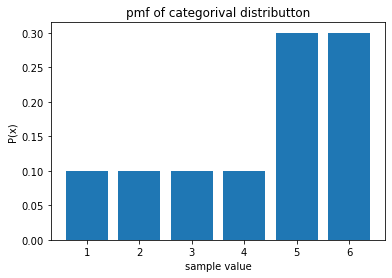

In [3]:
plt.bar(xx, rv.pmf(xx_ohe.values)) #pmf()메서드의 인수로도 원랏인코딩 벡터를 넣어야함.
plt.ylabel("P(x)")
plt.xlabel("sample value")
plt.title("pmf of categorival distributton")
plt.show()

In [4]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

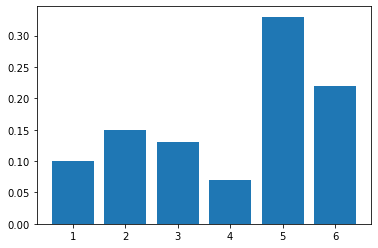

In [5]:
y = X.sum(axis=0)/float(len(X))
plt.bar(np.arange(1,7),y)
plt.show()

In [6]:
import seaborn as sns
mu, N, M=0.5, 5, 10
rv = sp.stats.binom(N, mu)
x = rv.rvs(M, random_state=0)
x

array([3, 3, 3, 3, 2, 3, 2, 4, 4, 2])

In [7]:
y = np.bincount(x, minlength=N+1) / float(len(x))
y

array([0. , 0. , 0.3, 0.5, 0.2, 0. ])

In [8]:
xx = np.arange(N+1)
df = pd.DataFrame({'Theory': rv.pmf(xx),'Simulation': y})
df

,Theory,Simulation
0,0.03125,0.0
1,0.15625,0.0
2,0.31250,0.3
3,0.31250,0.5
4,0.15625,0.2
5,0.03125,0.0


In [9]:
df = pd.DataFrame({'Theory': rv.pmf(xx),'Simulation': y}).stack()
df

0  Theory        0.03125
   Simulation    0.00000
1  Theory        0.15625
   Simulation    0.00000
2  Theory        0.31250
   Simulation    0.30000
3  Theory        0.31250
   Simulation    0.50000
4  Theory        0.15625
   Simulation    0.20000
5  Theory        0.03125
   Simulation    0.00000
dtype: float64

In [10]:
df = df.reset_index()
df

,level_0,level_1,0
0,0,Theory,0.03125
1,0,Simulation,0.00000
2,1,Theory,0.15625
3,1,Simulation,0.00000
4,2,Theory,0.31250
5,2,Simulation,0.30000
6,3,Theory,0.31250
7,3,Simulation,0.50000
8,4,Theory,0.15625
9,4,Simulation,0.20000


In [11]:
df.columns = ['sample value', 'type', 'ratio']

df.pivot('sample value','type', 'ratio')

type,Simulation,Theory
sample value,,
0,0.0,0.03125
1,0.0,0.15625
2,0.3,0.31250
3,0.5,0.31250
4,0.2,0.15625
5,0.0,0.03125


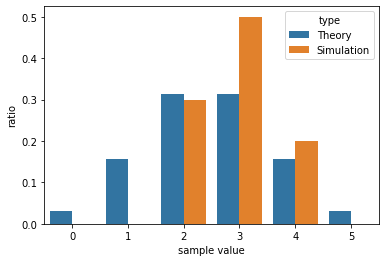

In [12]:
sns.barplot(x='sample value', y = 'ratio', hue = 'type', data = df)

plt.show()

In [13]:
from sklearn.datasets import load_iris
iris =load_iris()

In [14]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["varieties"] = pd.Series(iris.target, dtype = "category")
df1 =df[df["petal width (cm)"]> 1.5]
df2 =df[df["petal width (cm)"]<= 1.5]

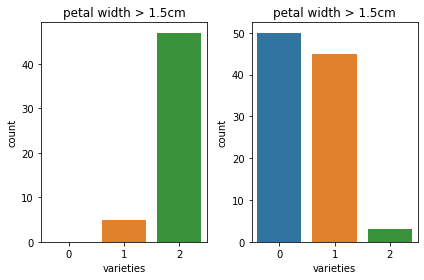

In [15]:
fig,ax =plt.subplots(1,2)
sns.countplot(x= "varieties", data= df1, ax= ax[0]).set_title("petal width > 1.5cm")
sns.countplot(x= "varieties", data= df2, ax= ax[1]).set_title("petal width > 1.5cm")
plt.tight_layout()
plt.show()

In [16]:
from math import factorial

def f(N,x,mu):
    x_prod = 1
    mu_prod = 1
    for i in range(len(x)):
        x_prod*=factorial(x[i])
        mu_prod*=mu[i]**x[i]
    return factorial(N)*mu_prod/x_prod

In [17]:
f(20,[3,6,8,3],[0.2,0.4,0.3,0.1])

0.0050048269882490915

In [109]:
N=30

mu = [0.1,0.1,0.1,0.1,0.3,0.3]
rv = sp.stats.multinomial(N,mu)
np.random.seed(0)
X= rv.rvs(100)
X[:10]



array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9],
       [ 3,  1,  6,  3,  8,  9],
       [ 2,  4,  3,  3,  5, 13],
       [ 3,  3,  3,  6,  8,  7],
       [ 2,  3,  4,  1, 11,  9],
       [ 4,  2,  1,  2, 10, 11]])

C:\Users\Hoseo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hoseo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hoseo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hoseo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hoseo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points

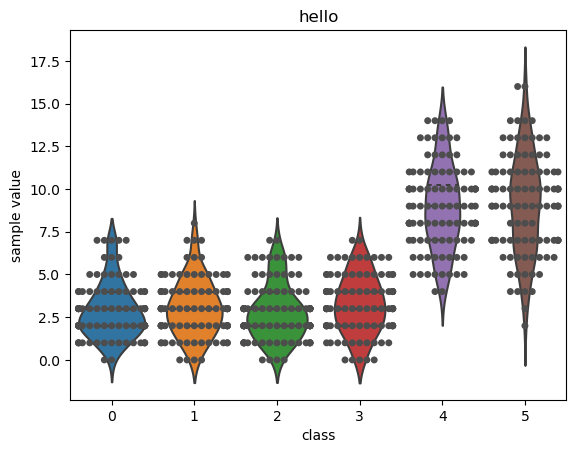

In [110]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial","class", "sample value"]
sns.violinplot(x = "class", y = "sample value", data=df, inner= "quartile")
sns.swarmplot(x="class", y="sample value", data =df, color =".3")
plt.title("hello")
plt.show()

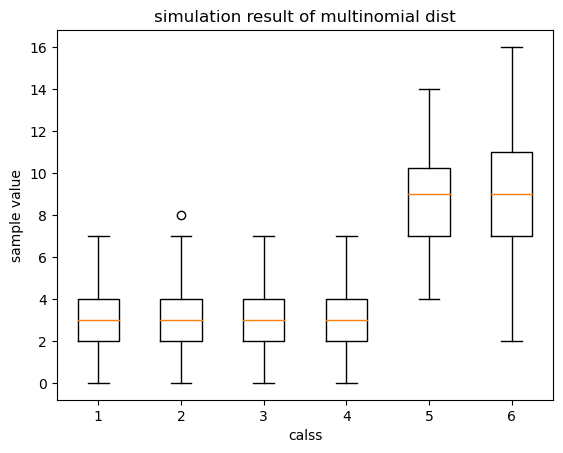

In [111]:
plt.boxplot(X)
plt.title("simulation result of multinomial dist")
plt.xlabel("calss")
plt.ylabel("sample value")
plt.show()

In [112]:
N=6

mu = [0.2,0.3,0.5]
rv = sp.stats.multinomial(N,mu)
np.random.seed(0)
X= rv.rvs(100)
X[:10]


array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 3, 2],
       [3, 1, 2],
       [2, 2, 2],
       [1, 3, 2],
       [0, 1, 5],
       [0, 3, 3],
       [2, 3, 1]])

In [113]:
round(f(6,[1,2,3],[0.2,0.3,0.5]),3)

0.135

In [18]:

np.random.seed(0)
X= rv.rvs(100)

In [115]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["varieties"] = pd.Series(iris.target, dtype = "category")
df1 =df[df["petal width (cm)"]> 1.5]
df2 =df[df["petal width (cm)"]<= 1.5]

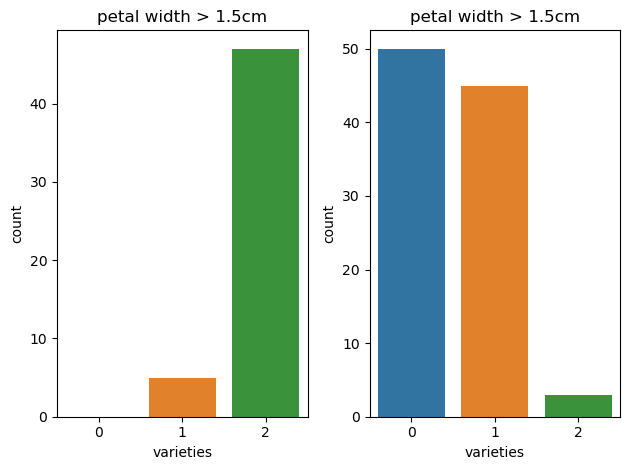

In [116]:
fig,ax =plt.subplots(1,2)
sns.countplot(x= "varieties", data= df1, ax= ax[0]).set_title("petal width > 1.5cm")
sns.countplot(x= "varieties", data= df2, ax= ax[1]).set_title("petal width > 1.5cm")
plt.tight_layout()
plt.show()

In [117]:
def plot_categorical(mu,N):
    rv = sp.stats.multinomial(1,mu)
    xx = np.arange(1, len(mu) +1)
    xx_ohe = pd.get_dummies(xx)
    X= rv.rvs(N, random_state =0)
    y = X.sum(axis=0)/float(len(X))
    df= pd.DataFrame({'Theory': rv.pmf(xx_ohe.values),'Simulation': y},index = xx).stack()
    df=df.reset_index()
    df.columns = ['sample value','type','ratio']
    df.pivot('sample value','type', 'ratio')
    sns.barplot(x='sample value', y = 'ratio', hue = 'type', data = df)
    plt.ylim(0, 0.6)
    

In [118]:
def cat_mean_var(mu,N):
    rv = sp.stats.multinomial(1,mu)
    X = rv.rvs(N,random_state = 0)
    print("기댓값", np.mean(X))
    print("분산", np.var(X))
    

In [119]:
mu1 = [0.25,0.25,0.25,0.25]
mu2 = [0.3,0.3,0.2,0.2]

In [120]:
np.random.seed(0)
X= rv.rvs(100)

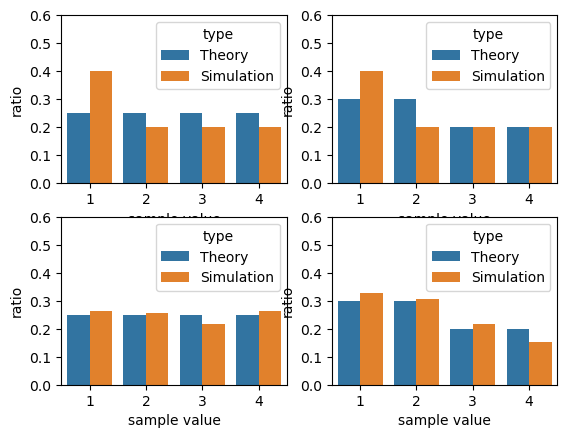

In [124]:
plt.subplot(221)
plot_categorical(mu1, 10)
plt.subplot(222)
plot_categorical(mu2, 10)
plt.subplot(223)
plot_categorical(mu1, 1000)
plt.subplot(224)
plot_categorical(mu2, 1000)

In [127]:
cat_mean_var(mu1,10)

기댓값 0.25
분산 0.1875


In [128]:
cat_mean_var(mu2,10)

기댓값 0.25
분산 0.1875


In [19]:
from scipy.stats import multinomial

# 다항 분포의 매개변수
n = 6
p = [0.2, 0.3, 0.5]  # A, B, C의 이길 확률

# 각각 1, 2, 3 게임을 이길 확률
x = [1, 2, 3]

# 다항 분포의 확률 질량 함수 계산
pmf = multinomial.pmf(x, n, p)

# 결과 출력
print(f"플레이어 A가 1 게임, 플레이어 B가 2 게임, 플레이어 C가 3 게임을 이길 확률: {pmf:.4f}")


플레이어 A가 1 게임, 플레이어 B가 2 게임, 플레이어 C가 3 게임을 이길 확률: 0.1350
